### Extracting Data from JSONs

In [1]:
import pandas as pd
import json

In [2]:
def read_json_file(file):

    # read the entire file into a python array
    with open(file, 'r') as f:
        data = f.readlines()

    # remove the trailing "\n" from each line while creating a list of dictionaries
    data = [json.loads(entry.strip('\n')) for entry in data]
    
    return pd.DataFrame(data)

In [3]:
df = read_json_file('data/yelp_dataset/photo.json')

In [4]:
df.head()

,caption,photo_id,business_id,label
0,,MllA1nNpcp1kDteVg6OGUw,rcaPajgKOJC2vo_l3xa42A,inside
1,,YjxBE88Bf6CmTEF2LP1UNA,Kn23LDd740SBVJ7mum0fwg,inside
2,,1f7izSjM0WjkDRIVbPy1yw,ZkGDCVKSdf8m76cnnalL-A,food
3,,NcSlcDTEEeOaixotOPk-rA,bF8gv7k_rwZtiDLP2ZB04w,inside
4,,5IiIo5UKEW0lWqZ6sWrY_A,50Anorn0DJXFhBr9a9_gHQ,inside


### Reading in Images

In [15]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps

In [17]:
def show_images(image_path_list):
    plt.figure()
    for i, image_path in enumerate(image_path_list):
        plt.subplot(1, len(image_path_list), i+1)
        plt.imshow(np.asarray(Image.open(image_path)))
        plt.title(image_path)
        plt.grid(False)
        plt.yticks([])
        plt.xticks([])
    plt.show()

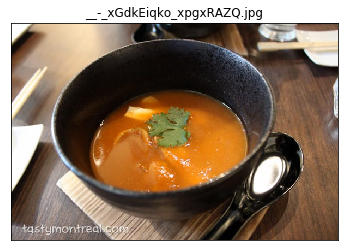

In [49]:
show_images(['__-_xGdkEiqko_xpgxRAZQ.jpg'])

In [50]:
# Pulling image metadata 

img = '__-_xGdkEiqko_xpgxRAZQ.jpg'
img = img.replace('.jpg','')
df[df['photo_id'] == x]

,caption,photo_id,business_id,label
13230,Spicy lemongrass tomato soup with fragrant sli...,__-_xGdkEiqko_xpgxRAZQ,TdMEsI-NKn64Pz3y62y5sg,food


In [64]:
# Create a smaller subsample of classes
def create_subsample(n=1000):
    labels = df['label'].unique()
    sample_df = pd.DataFrame()

    for label in labels:
        l_sample = df[df['label'] == label].sample(n=n, random_state=42)
        sample_df = sample_df.append(l_sample)
        
    return sample_df


sdf = create_subsample()
sdf['label'].value_counts()

outside    1000
menu       1000
drink      1000
food       1000
inside     1000
Name: label, dtype: int64